<a href="https://colab.research.google.com/github/kpawel98/Projek/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv ('winequality-white.csv', sep=';')

In [4]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.quality.value_counts()


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [8]:
df.shape


(4898, 12)

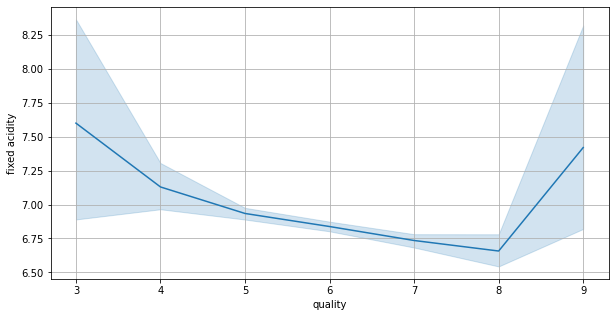

In [9]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='fixed acidity', data=df)
plt.grid()

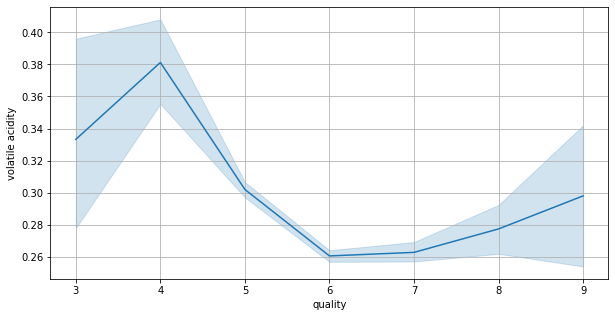

In [10]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='volatile acidity', data=df)
plt.grid()

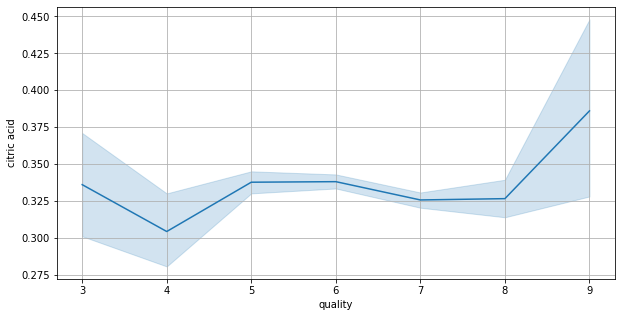

In [11]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='citric acid', data=df)
plt.grid()

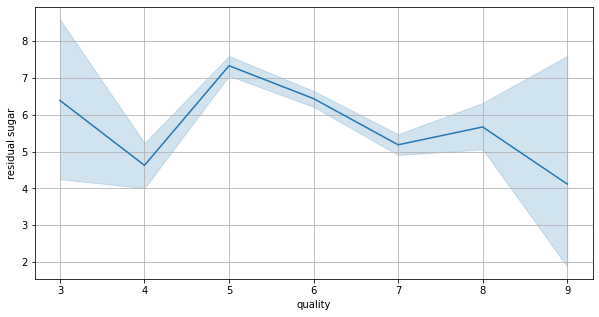

In [12]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='residual sugar', data=df)
plt.grid()

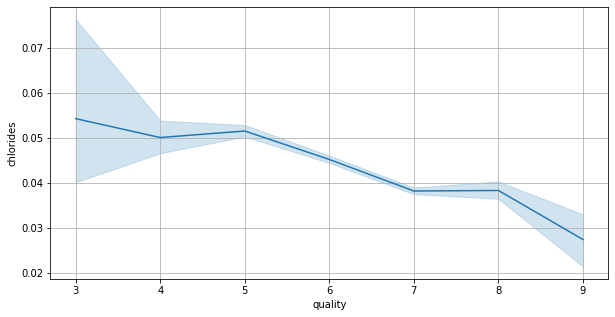

In [13]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='chlorides', data=df)
plt.grid()

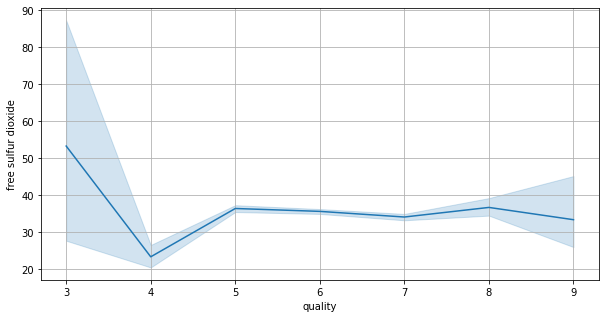

In [14]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='free sulfur dioxide', data=df)
plt.grid()

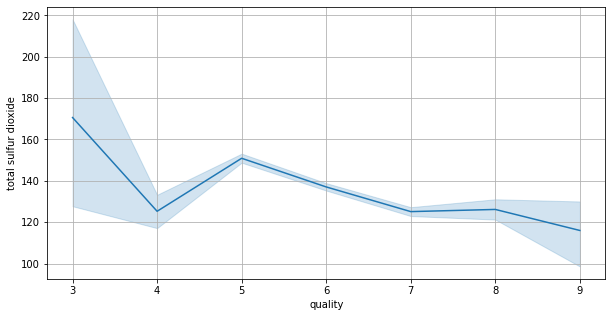

In [15]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='total sulfur dioxide', data=df)
plt.grid()

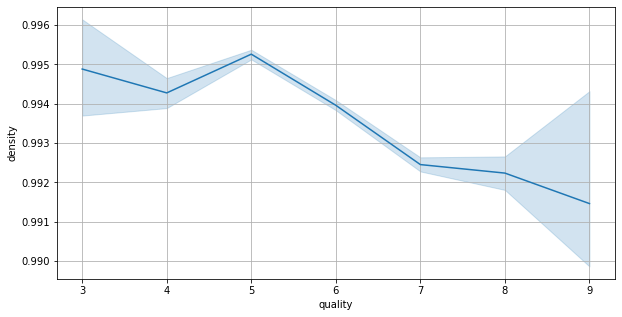

In [16]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='density', data=df)
plt.grid()

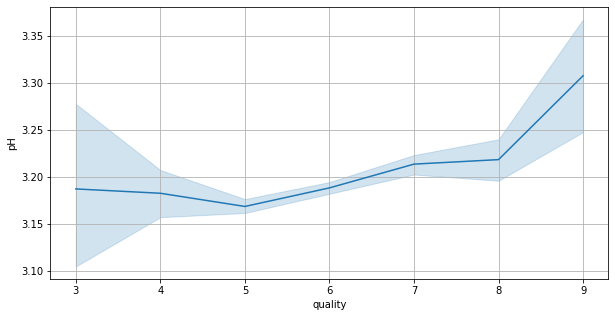

In [17]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='pH', data=df)
plt.grid()

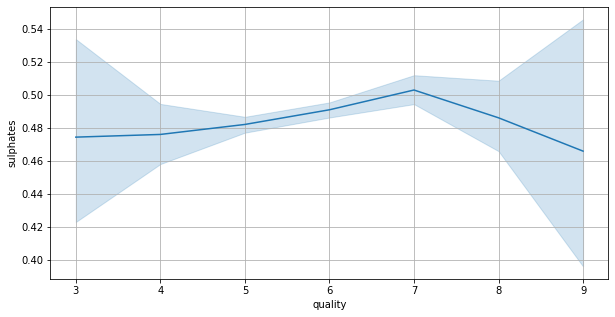

In [18]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='sulphates', data=df)
plt.grid()

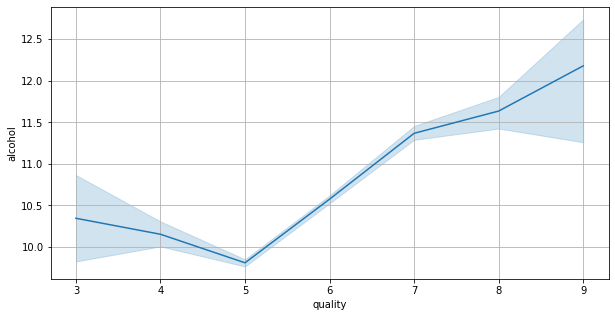

In [19]:
fig = plt.figure (figsize = (10,5))
sns.lineplot (x='quality', y='alcohol', data=df)
plt.grid()

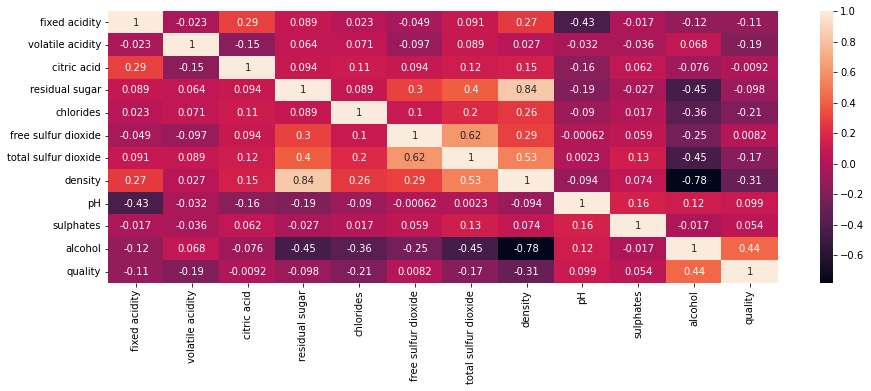

In [20]:
plt.figure(figsize = (15,5))
corr = df.corr()
sns.heatmap(corr,annot = True)

In [21]:
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [22]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()

In [23]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [24]:
df['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

In [25]:
x = df.iloc[:,0:11]
y = df['quality']

In [26]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =13)

In [29]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [30]:
for name, score in zip(x.columns, rf.feature_importances_):
    print(name, score *100)

fixed acidity 6.422371067238457
volatile acidity 8.236653519163253
citric acid 7.5062212593352236
residual sugar 8.81295322060937
chlorides 8.649481925814285
free sulfur dioxide 8.324809418342696
total sulfur dioxide 8.263258725706915
density 12.094980502592994
pH 8.55536043496341
sulphates 7.784622631106421
alcohol 15.34928729512698


In [31]:
models = pd.DataFrame({
    'Features' : x.columns,
    'Importance' : rf.feature_importances_ *100})

models.sort_values(by = 'Importance', ascending = False)

,Features,Importance
10,alcohol,15.349287
7,density,12.094981
3,residual sugar,8.812953
4,chlorides,8.649482
8,pH,8.555360
5,free sulfur dioxide,8.324809
6,total sulfur dioxide,8.263259
1,volatile acidity,8.236654
9,sulphates,7.784623
2,citric acid,7.506221


In [32]:
df.drop(columns = ['fixed acidity','citric acid','sulphates'], inplace = True)

In [33]:
x = df.drop(columns = 'quality')
y = df['quality']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[-0.0817699   2.82134917 -0.035355   ...  2.33151201 -1.24692128
  -1.39315246]
 [ 0.21589563 -0.94476527  0.14774708 ... -0.00915417  0.74002864
  -0.82427568]
 [ 0.01745194  0.10028219  0.1935226  ...  0.3586648   0.47510198
  -0.33666701]
 ...
 [-0.37943543 -1.02363678 -0.21845708 ... -0.49735026 -1.31315295
  -0.90554379]
 [ 0.11667379 -1.04335466 -1.08819196 ... -1.78471666  1.0049553
   1.85757201]
 [-0.67710097 -1.10250829 -1.179743   ... -1.54396243  0.47510198
   1.04489089]]


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state =13)

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3428, 8)
(3428,)
(1470, 8)
(1470,)


In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [38]:
lr_acc = accuracy_score(y_test, lr.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, lr.predict(x_train)), 4)*100} %")
print(f"Accuracy Score of Test Data is {round(lr_acc, 4)*100} %\n")

Accuracy Score of Training Data is 79.96 %
Accuracy Score of Test Data is 79.66 %



In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
knn_acc = accuracy_score(y_test, knn.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, knn.predict(x_train)),4)*100} %")
print(f"Accuracy Score of Test Data is {round(knn_acc, 4)*100} %\n")

Accuracy Score of Training Data is 86.9 %
Accuracy Score of Test Data is 81.02000000000001 %



In [41]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, dtc.predict(x_train)),4)*100} %")
print(f"Accuracy Score of Test Data is {round(dtc_acc, 4)*100} %\n")

Accuracy Score of Training Data is 100.0 %
Accuracy Score of Test Data is 83.54 %



In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [44]:
nb_acc = accuracy_score(y_test, nb.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, nb.predict(x_train)),4)*100} %")
print(f"Accuracy Score of Test Data is {round(nb_acc, 4)*100} %\n")

Accuracy Score of Training Data is 73.25 %
Accuracy Score of Test Data is 74.22 %



In [45]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
rf_acc = accuracy_score(y_test, rf.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, rf.predict(x_train)),4)*100} %")
print(f"Accuracy Score of Test Data is {round(rf_acc, 4)*100} %\n")

Accuracy Score of Training Data is 100.0 %
Accuracy Score of Test Data is 88.3 %



In [47]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [48]:
svc_acc = accuracy_score(y_test, svc.predict(x_test))
print(f"Accuracy Score of Training Data is {round(accuracy_score(y_train, svc.predict(x_train)),4)*100} %")
print(f"Accuracy Score of Test Data is {round(svc_acc, 4)*100} %\n")

Accuracy Score of Training Data is 81.74 %
Accuracy Score of Test Data is 82.65 %



In [49]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN','Decision Tree', 'NaiveBayes', 'RandomForest', 'SVC'],
    'Procent' : [round(lr_acc, 4)*100, round(knn_acc, 4)*100, round(dtc_acc, 4)*100, round(nb_acc, 4)*100, round(rf_acc, 4)*100, round(svc_acc, 4)*100]
})


models.sort_values(by = 'Procent', ascending = False)

,Model,Procent
4,RandomForest,88.30
2,Decision Tree,83.54
5,SVC,82.65
1,KNN,81.02
0,Logistic Regression,79.66
3,NaiveBayes,74.22


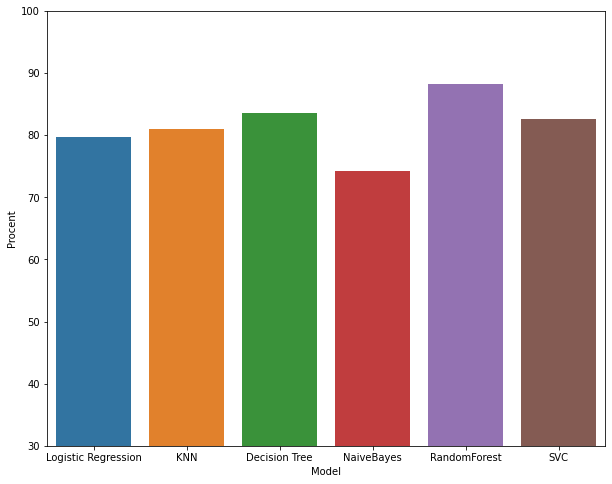

In [50]:
plt.figure(figsize = (10, 8))

sns.barplot(x = 'Model', y = 'Procent', data = models)
plt.ylim(30, 100)
plt.show()

In [51]:
rf_eval = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = 10)
rf_eval.mean()

0.8573465977869844

In [52]:
lr_eval = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = 10)
lr_eval.mean()

0.7969626447070056

In [53]:
knn_eval = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = 10)
knn_eval.mean()

0.8100872930625884

In [54]:
dtc_eval = cross_val_score(estimator = dtc, X = x_train, y = y_train, cv = 10)
dtc_eval.mean()

0.8060107752374133

In [55]:
nb_eval = cross_val_score(estimator = nb, X = x_train, y = y_train, cv = 10)
nb_eval.mean()

0.72957734472235

In [56]:
svc_eval = cross_val_score(estimator = svc, X = x_train, y = y_train, cv = 10)
svc_eval.mean()

0.8074727635415069